# Import needed libraries

## Import libraries for manipulating the data and statistic

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats.weightstats import  ttest_ind as t_test
from scipy.stats import ttest_1samp, wilcoxon, ttest_ind, mannwhitneyu
import scipy.special as special
import emoji
from math import pi
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison
from statsmodels.formula.api import ols
import statsmodels.stats.api as sms
from scipy.stats import friedmanchisquare, rankdata, norm
from scipy.special import gammaln
from math import sqrt

## Import libraries for static ploting

In [2]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')
# some nice colors from http://colorbrewer2.org/
COLOR1 = '#7fc97f'
COLOR2 = '#beaed4'
COLOR3 = '#fdc086'
COLOR4 = '#ffff99'
COLOR5 = '#386cb0'

# Statring the test and visulize the data

## Load the data

In [3]:
datafile = "./results/result_naomy.csv"
df = pd.read_csv(datafile)

In [4]:
df

,Methods,Model,Greedy Inbound Prune,Least Magn,UCB1,Tomp. Sampl.
0,LeCun (MNIST)1,0.98,0.98,0.91,0.99,0.99
1,LeCun (MNIST)2,0.98,0.97,0.90,0.98,0.98
2,LeCun (MNIST)all,0.98,0.98,0.91,0.99,0.99
3,Conv (Cifar10)1,0.81,0.80,0.73,0.81,0.81
4,Conv (Cifar10)2,0.81,0.80,0.74,0.81,0.81
5,Conv (Cifar10)3,0.81,0.80,0.73,0.81,0.81
6,Conv (Cifar10)4,0.81,0.79,0.73,0.81,0.81
7,Conv (Cifar10)all,0.81,0.80,0.74,0.82,0.82
8,Conv (Cifar100)1,0.43,0.40,0.31,0.43,0.43
9,Conv (Cifar100)2,0.43,0.41,0.30,0.43,0.43


In [5]:
df1 = df.copy()



## Using Nonparametric tests

I am not sure the data comes from Guassian distribution  and less than 30 sample 

### alternative to paired t-test when data has an ordinary scale or when not
### normally distributed

## Start comparining all pruning algorithms

### Compute friedman test test by ranks between pruning methods

In [6]:
df1.rank(axis=1)

,Model,Greedy Inbound Prune,Least Magn,UCB1,Tomp. Sampl.
0,2.5,2.5,1.0,4.5,4.5
1,4.0,2.0,1.0,4.0,4.0
2,2.5,2.5,1.0,4.5,4.5
3,4.0,2.0,1.0,4.0,4.0
4,4.0,2.0,1.0,4.0,4.0
5,4.0,2.0,1.0,4.0,4.0
6,4.0,2.0,1.0,4.0,4.0
7,3.0,2.0,1.0,4.5,4.5
8,4.0,2.0,1.0,4.0,4.0
9,4.0,2.0,1.0,4.0,4.0


In [7]:
df1.rank(axis=1).mean()

Model                   3.550000
Greedy Inbound Prune    2.033333
Least Magn              1.033333
UCB1                    4.283333
Tomp. Sampl.            4.100000
dtype: float64

In [8]:
df1.head(2)

,Methods,Model,Greedy Inbound Prune,Least Magn,UCB1,Tomp. Sampl.
0,LeCun (MNIST)1,0.98,0.98,0.91,0.99,0.99
1,LeCun (MNIST)2,0.98,0.97,0.90,0.98,0.98


In [9]:
data =  np.stack((df1['Model'], df1['UCB1'], df1['Tomp. Sampl.'],
                  df1['Least Magn'], df1['Greedy Inbound Prune']))

In [10]:
print(friedmanchisquare(df1['Model'], df1['UCB1'], df1['Tomp. Sampl.'],
                  df1['Least Magn'], df1['Greedy Inbound Prune']))

FriedmanchisquareResult(statistic=111.09302325581405, pvalue=4.2546352050479307e-23)


exec(open("nemopy.py").read())
nemenyi = NemenyiTestPostHoc(data)
meanRanks, pValues = nemenyi.do()

In [11]:
meanRanks = df1.rank(axis=1).mean() 

In [12]:
lst = list(df1.columns.values)
lst.remove('Methods')

In [13]:
len(lst)

5

In [14]:
df1.iloc[1].size

6

In [15]:
q = 2.728# pvalue = 0.05 and number of datasets 3.426041249
#q = 3.029694463 # pvalue = 0.1
N = (df1['Model'].size)
k = (df1.iloc[1].size)-1

In [16]:
CD = q * sqrt(k*(k+1)/(6.0*N))

In [17]:
CD

1.1137013363854185

In [18]:
lst

['Model', 'Greedy Inbound Prune', 'Least Magn', 'UCB1', 'Tomp. Sampl.']

In [19]:
new_model_pairs = []
for m1,m2 in zip(meanRanks,lst): 
    print('\n',m2, m1, )


 Model 3.55

 Greedy Inbound Prune 2.03333333333

 Least Magn 1.03333333333

 UCB1 4.28333333333

 Tomp. Sampl. 4.1


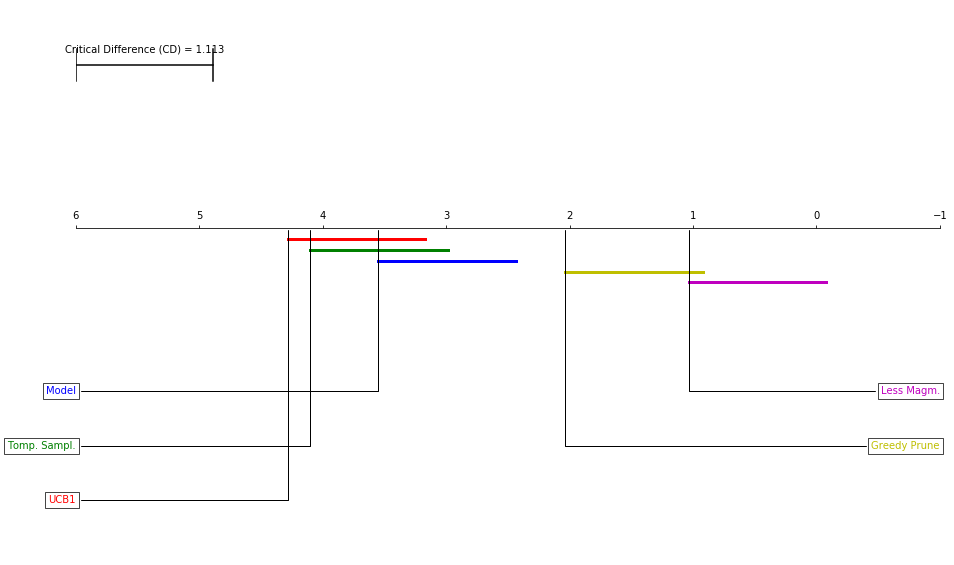

In [21]:
# input data
cd = CD
limits=(6,-1)
fig, ax = plt.subplots(figsize=(20,10))
plt.subplots_adjust(left=0.2, right=0.8)

# set up plot
ax.set_xlim(limits)
ax.set_ylim(0,1)
ax.spines['top'].set_position(('axes', 0.6))
#ax.xaxis.tick_top()
ax.xaxis.set_ticks_position('top')
ax.yaxis.set_visible(False)
for pos in ["bottom", "left", "right"]:
    ax.spines[pos].set_visible(False)

# CD bar
ax.plot([limits[0],limits[0]-cd], [.9,.9], color="k")
ax.plot([limits[0],limits[0]], [.9-0.03,.9+0.03], color="k")
ax.plot([limits[0]-cd,limits[0]-cd], [.9-0.03,.9+0.03], color="k") 
ax.text(limits[0]-cd/2., 0.92, "Critical Difference (CD) = 1.113", ha="center", va="bottom") 

# annotations
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
arrowprops=dict(arrowstyle="-",connectionstyle="angle,angleA=0,angleB=90")
kw = dict(xycoords='data',textcoords="axes fraction",
          arrowprops=arrowprops, bbox=bbox_props, va="center")


ax.annotate("UCB1", xy=(meanRanks[3], 0.6), xytext=(0,0.1),ha="right",  **kw, color="r")
ax.annotate("Tomp. Sampl.", xy=(meanRanks[4], 0.6), xytext=(0,0.2),ha="right",  **kw, color="g")
ax.annotate("Model", xy=(meanRanks[0], 0.6), xytext=(0,0.3),ha="right",  **kw, color="b")

ax.annotate("Greedy Prune", xy=(meanRanks[1], 0.6), xytext=(1,0.2),ha="right",  **kw, color="y")
ax.annotate("Less Magm.", xy=(meanRanks[2], 0.6), xytext=(1,0.3),ha="right",  **kw, color="m")

#bars
ax.plot([meanRanks[3],meanRanks[3]-CD],[0.58,0.58], color="r", lw=3)
ax.plot([meanRanks[4],meanRanks[4]-CD],[0.56,0.56], color="g", lw=3)
ax.plot([meanRanks[0],meanRanks[0]-CD],[0.54,0.54], color="b", lw=3)
ax.plot([meanRanks[1],meanRanks[1]-CD],[0.52,0.52], color="y", lw=3)
ax.plot([meanRanks[2],meanRanks[2]-CD],[0.5,0.5], color="m", lw=3)

plt.show()